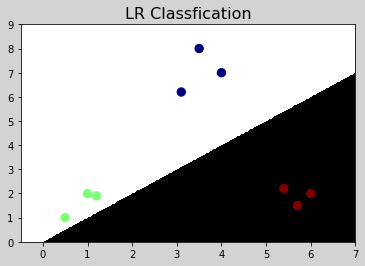

In [15]:
#逻辑回归解决多元分类问题
import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as lm

x=np.array([[4,7],[3.5,8],[3.1,6.2],[0.5,1],[1,2],[1.2,1.9],[6,2],[5.7,1.5],[5.4,2.2]])
y=np.array([0,0,0,1,1,1,2,2,2])
model=lm.LogisticRegression(solver='liblinear',C=1000)
model.fit(x,y)

#绘制边际线
l,r=x[:,0].min()-1,x[:,0].max()+1
b,t=x[:,1].min()-1,x[:,1].max()+1
#把可视区间划分为500*500
n=500
grid_x,grid_y=np.meshgrid(np.linspace(l,r,n),np.linspace(b,t,n))
#模拟使用模型，得到点阵中每个坐标的类别    piecewise：分段/分片
mesh_x=np.column_stack(   #(250000,2) 
    (grid_x.ravel(),grid_y.ravel()))   #ravel将多维数组转换为一维数组的功能
mesh_z=model.predict(mesh_x)
grid_z=mesh_z.reshape(grid_x.shape)
grid_z=np.piecewise(grid_x,[grid_x>grid_y,grid_x<grid_y],[0,1])#＞Y的设为0，＜y的设为1

#画图
mp.figure('LR Classfication',facecolor='lightgray')
mp.title('LR Classfication',fontsize=16)
mp.tick_params(labelsize=10)
#根据参数把可视区间拆分成坐标网格，由于每个网格都有相应类别，可以使用cmap为每个网格填充颜色
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')#调用mp.pcolormesh()绘制边界线
#zorder=3相当于在z轴的层次关系，联想一下修图的图层
mp.scatter(x[:,0],x[:,1],c=y , cmap='jet',label='Sample Point',s=70,zorder=3)

mp.show()